In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from models.mnist import MNIST13k
from torchsummary import summary
from utils import TrainTest, PlotOutput

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
device = TrainTest.get_device()
device

'cuda'

In [3]:
mean = [0.1307]
std = [0.3081]

# Train data transformations
train_transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-7., 7.), fill=(0,)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_data.mean = torch.tensor(mean).reshape(len(mean), 1, 1)
test_data.mean = train_data.mean

train_data.std = torch.tensor(std).reshape(len(std), 1, 1)
test_data.std = train_data.std

classes = train_data.classes

In [5]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

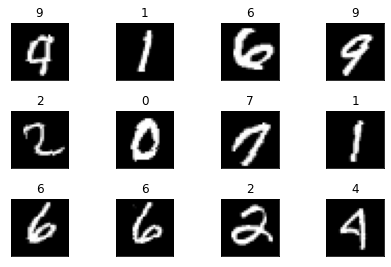

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])

In [7]:
"""
RF_out = RF_in + (kernel-1) * J_in
J_out = J_in * stride
"""

'\nRF_out = RF_in + (kernel-1) * J_in\nJ_out = J_in * stride\n'

In [8]:
model = MNIST13k().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             576
       BatchNorm2d-6            [-1, 8, 28, 28]              16
              ReLU-7            [-1, 8, 28, 28]               0
           Dropout-8            [-1, 8, 28, 28]               0
            Conv2d-9            [-1, 8, 28, 28]             576
      BatchNorm2d-10            [-1, 8, 28, 28]              16
             ReLU-11            [-1, 8, 28, 28]               0
          Dropout-12            [-1, 8, 28, 28]               0
       BasicBlock-13            [-1, 8, 28, 28]               0
       InputBlock-14            [-1, 8,

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=1, verbose=True)

criterion = F.cross_entropy

In [10]:
EPOCHS = 20

run = TrainTest(model=model, 
                trainloader=train_loader, 
                testloader=test_loader, 
                optimizer=optimizer, 
                criterion=criterion, 
                scheduler=scheduler,
                target_layers=None)

run(epochs=EPOCHS, cam=False, image_idx=None)

Train: Loss=0.2802 Batch_id=1874 Accuracy=93.81: 100%|██████████| 1875/1875 [00:27<00:00, 68.73it/s]


Test set: Average loss: 0.1941, Accuracy: 9416/10000 (94.16%)



Train: Loss=0.0995 Batch_id=1874 Accuracy=97.38: 100%|██████████| 1875/1875 [00:27<00:00, 68.39it/s]


Test set: Average loss: 0.0510, Accuracy: 9854/10000 (98.54%)



Train: Loss=0.0771 Batch_id=1874 Accuracy=98.00: 100%|██████████| 1875/1875 [00:27<00:00, 68.74it/s]


Test set: Average loss: 0.0510, Accuracy: 9868/10000 (98.68%)



Train: Loss=0.0652 Batch_id=1874 Accuracy=98.25: 100%|██████████| 1875/1875 [00:27<00:00, 69.36it/s]


Test set: Average loss: 0.0416, Accuracy: 9885/10000 (98.85%)



Train: Loss=0.0549 Batch_id=1874 Accuracy=98.50: 100%|██████████| 1875/1875 [00:27<00:00, 68.13it/s]


Test set: Average loss: 0.0308, Accuracy: 9911/10000 (99.11%)



Train: Loss=0.0509 Batch_id=1874 Accuracy=98.63: 100%|██████████| 1875/1875 [00:27<00:00, 68.83it/s]


Test set: Average loss: 0.0331, Accuracy: 9907/10000 (99.07%)



Train: Loss=0.0482 Batch_id=1874 Accuracy=98.65: 100%|██████████| 1875/1875 [00:26<00:00, 70.26it/s]


Test set: Average loss: 0.0247, Accuracy: 9925/10000 (99.25%)



Train: Loss=0.0435 Batch_id=1874 Accuracy=98.79: 100%|██████████| 1875/1875 [00:27<00:00, 69.38it/s]


Test set: Average loss: 0.0272, Accuracy: 9918/10000 (99.18%)



Train: Loss=0.0423 Batch_id=1874 Accuracy=98.78: 100%|██████████| 1875/1875 [00:26<00:00, 69.47it/s]


Test set: Average loss: 0.0256, Accuracy: 9927/10000 (99.27%)

Epoch 00009: reducing learning rate of group 0 to 1.0000e-03.


Train: Loss=0.0296 Batch_id=1874 Accuracy=99.21: 100%|██████████| 1875/1875 [00:26<00:00, 70.30it/s]


Test set: Average loss: 0.0165, Accuracy: 9950/10000 (99.50%)



Train: Loss=0.0270 Batch_id=1874 Accuracy=99.27: 100%|██████████| 1875/1875 [00:27<00:00, 68.38it/s]


Test set: Average loss: 0.0168, Accuracy: 9950/10000 (99.50%)



Train: Loss=0.0264 Batch_id=1874 Accuracy=99.32: 100%|██████████| 1875/1875 [00:26<00:00, 70.78it/s]


Test set: Average loss: 0.0158, Accuracy: 9955/10000 (99.55%)



Train: Loss=0.0256 Batch_id=1874 Accuracy=99.31: 100%|██████████| 1875/1875 [00:26<00:00, 70.56it/s]


Test set: Average loss: 0.0169, Accuracy: 9946/10000 (99.46%)



Train: Loss=0.0247 Batch_id=1874 Accuracy=99.35: 100%|██████████| 1875/1875 [00:26<00:00, 70.25it/s]


Test set: Average loss: 0.0167, Accuracy: 9952/10000 (99.52%)

Epoch 00014: reducing learning rate of group 0 to 1.0000e-04.


Train: Loss=0.0230 Batch_id=1874 Accuracy=99.43: 100%|██████████| 1875/1875 [00:26<00:00, 70.01it/s]


Test set: Average loss: 0.0160, Accuracy: 9951/10000 (99.51%)



Train: Loss=0.0243 Batch_id=1874 Accuracy=99.32: 100%|██████████| 1875/1875 [00:26<00:00, 69.68it/s]


Test set: Average loss: 0.0161, Accuracy: 9952/10000 (99.52%)

Epoch 00016: reducing learning rate of group 0 to 1.0000e-05.


Train: Loss=0.0232 Batch_id=1874 Accuracy=99.39: 100%|██████████| 1875/1875 [00:27<00:00, 68.67it/s]


Test set: Average loss: 0.0159, Accuracy: 9950/10000 (99.50%)



Train: Loss=0.0232 Batch_id=1874 Accuracy=99.40: 100%|██████████| 1875/1875 [00:27<00:00, 67.86it/s]


Test set: Average loss: 0.0166, Accuracy: 9950/10000 (99.50%)

Epoch 00018: reducing learning rate of group 0 to 1.0000e-06.


Train: Loss=0.0231 Batch_id=1874 Accuracy=99.39: 100%|██████████| 1875/1875 [00:26<00:00, 70.26it/s]


Test set: Average loss: 0.0164, Accuracy: 9955/10000 (99.55%)



Train: Loss=0.0233 Batch_id=1874 Accuracy=99.42: 100%|██████████| 1875/1875 [00:27<00:00, 68.19it/s]


Test set: Average loss: 0.0162, Accuracy: 9953/10000 (99.53%)

Epoch 00020: reducing learning rate of group 0 to 1.0000e-07.


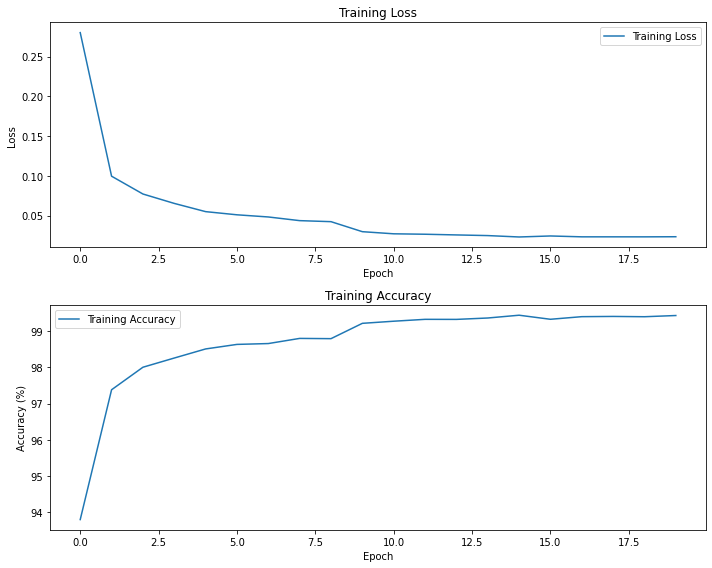

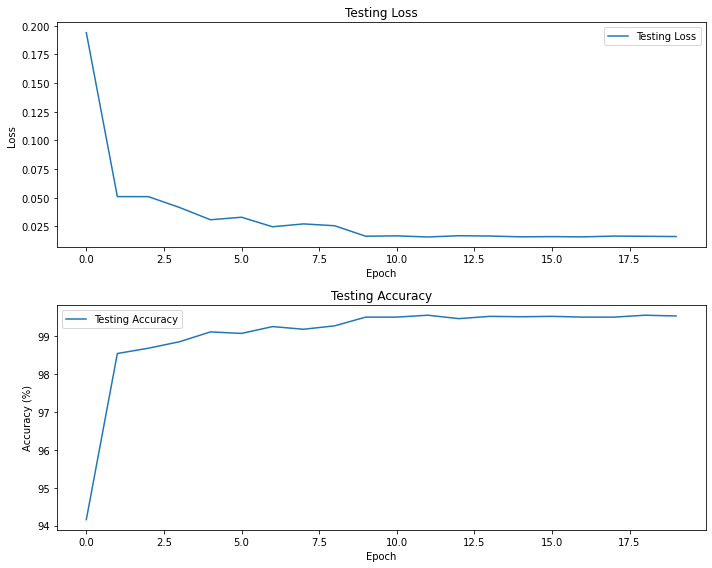

In [11]:
run.train.plot_stats()
run.test.plot_stats()

In [13]:
plot = PlotOutput(model, target_layers=None, device=device)

100%|██████████| 313/313 [00:02<00:00, 149.38it/s]


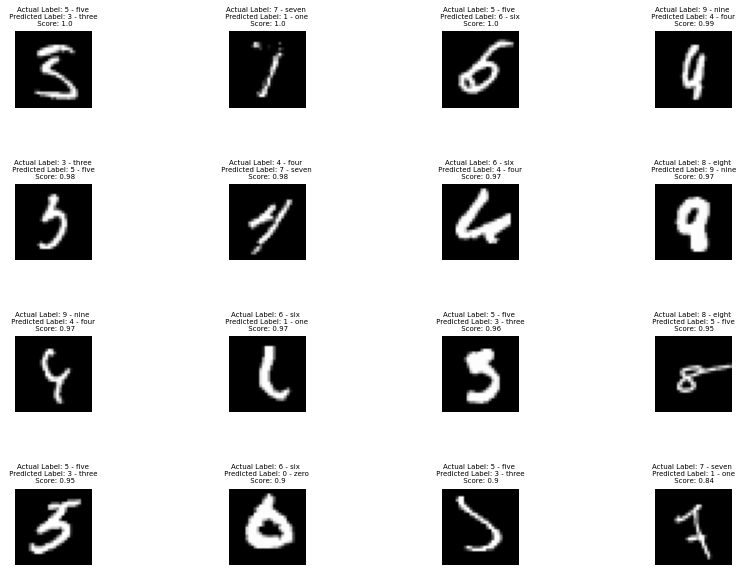

In [14]:
# plot incorrect plus very difficult classifications
plot.run_prediction(test_loader, ptype="incorrect")
plot.plot(n=16, class_list=classes, grad_cam=False)

100%|██████████| 313/313 [00:02<00:00, 129.66it/s]


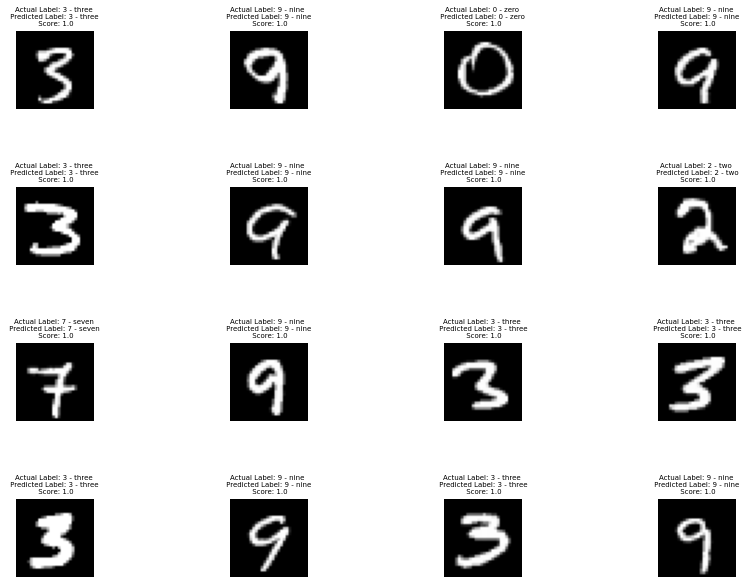

In [15]:
# plot correct yet difficult classifications
plot.run_prediction(test_loader, ptype="correct")
plot.plot(n=16, class_list=classes, grad_cam=False, reverse=True)